# Two-dimensional liquids and solids

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations

In [67]:
colors = list(mcolors.TABLEAU_COLORS.keys()) + list(mcolors.BASE_COLORS.keys()) + list(mcolors.CSS4_COLORS.keys())

In [68]:
distance = lambda p1,p2: np.sqrt(np.sum((p1 - p2)**2, axis=-1))

## Periodic Boundaries

In [69]:
def show_conf(centers, radius):
    color = np.random.choice(colors)
    for x,y in centers:
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                cir = plt.Circle((x+dx, y+dy), radius=radius, fc=color, ec="black")
                plt.gca().add_patch(cir)
    plt.axis("scaled")
    plt.axis([0.0, 1.0]*2)
    plt.show()

In [62]:
def sample_disks_direct(balls, radius, pair_idx):
    coords = np.random.uniform(size=(balls, 2))
    if np.min(distance(coords[(pair_idx[:,0])], coords[(pair_idx[:,1])])) < 2*radius:
        return sample_disks_direct(balls, radius, pair_idx)
    return coords

In [63]:
def direct_sampling(runs, balls, radius):
    pair_idx = np.array(list(combinations(range(0, balls),2)))
    return np.squeeze([sample_disks_direct(balls, radius, pair_idx) for x in range(int(runs))])

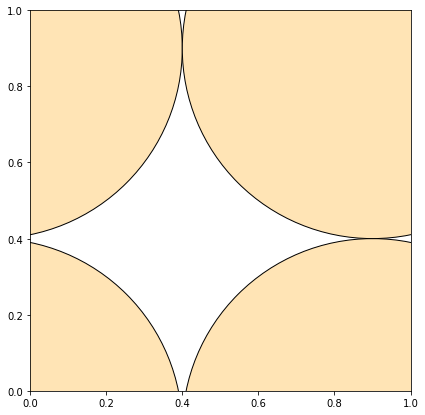

In [70]:
plt.rcParams["figure.figsize"] = 7, 7

show_conf([[0.9, 0.9]], radius=0.5)

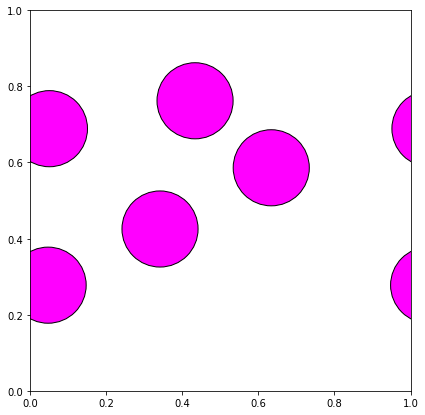

In [54]:
plt.rcParams["figure.figsize"] = 7, 7

show_conf(np.random.uniform(size=(5,2)), radius=0.1)

## MCMC Simulation with Periodic Conditions

## Densities and Local Orientational Order